# Apple and orange classification using Knn algorithm
## Overview

This project aims to classify apples and oranges based on their weight and size using a K-Nearest Neighbors (KNN) classifier. The dataset contains features such as weight and size, and the target variable is the class (apple or orange).

## Importing necessry libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

### importing Dataset

The dataset includes the following features:

Weight: The weight of the fruit in grams.

Size: The size of the fruit in centimeters.

Class: The class of the fruit (apple or orange).

In [5]:
df= pd.read_csv(r'C:\Users\admin\Downloads\apples_and_oranges.csv')

In [6]:
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [7]:
df = pd.DataFrame(df)

In [8]:
df.shape

(40, 3)

### Convert Class Column to Numeric:

In [10]:
df['Class'] = df['Class'].replace(['apple', 'orange'], [1, 0])
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_17400\1553866379.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace(['apple', 'orange'], [1, 0])


,Weight,Size,Class
0,69,4.39,0
1,69,4.21,0
2,65,4.09,0
3,72,5.85,1
4,67,4.70,0


## Generating Additional Data Points

In [12]:
num_new_points = 10
new_data = []
for _ in range(num_new_points):
   point = df.iloc[np.random.randint(0, len(df))]
   new_weight = point['Weight'] + np.random.uniform(-5, 5) 
   new_size = point['Size'] + np.random.uniform(-0.5, 0.5) 
   new_class = point['Class']
   new_data.append([round(new_weight), round(new_size, 1), new_class])

new_data_df = pd.DataFrame(new_data, columns=['weight', 'size', 'class'])

new_data = np.array(new_data)

data = np.vstack((df, new_data))

print(data)

[[69.    4.39  0.  ]
 [69.    4.21  0.  ]
 [65.    4.09  0.  ]
 [72.    5.85  1.  ]
 [67.    4.7   0.  ]
 [73.    5.68  1.  ]
 [70.    5.56  1.  ]
 [75.    5.11  1.  ]
 [74.    5.36  1.  ]
 [65.    4.27  0.  ]
 [73.    5.79  1.  ]
 [70.    5.47  1.  ]
 [74.    5.53  1.  ]
 [68.    4.47  0.  ]
 [74.    5.22  1.  ]
 [65.    4.48  0.  ]
 [69.    4.66  0.  ]
 [75.    5.25  1.  ]
 [67.    4.18  0.  ]
 [74.    5.5   1.  ]
 [66.    4.13  0.  ]
 [70.    4.83  0.  ]
 [69.    4.61  0.  ]
 [68.    4.08  0.  ]
 [67.    4.25  0.  ]
 [71.    5.35  1.  ]
 [67.    4.01  0.  ]
 [70.    4.22  0.  ]
 [74.    5.25  1.  ]
 [71.    5.26  1.  ]
 [73.    5.78  1.  ]
 [66.    4.68  0.  ]
 [72.    5.72  1.  ]
 [73.    5.17  1.  ]
 [68.    4.83  0.  ]
 [69.    4.11  0.  ]
 [69.    4.76  0.  ]
 [74.    5.48  1.  ]
 [70.    5.59  1.  ]
 [73.    5.03  1.  ]
 [70.    5.6   1.  ]
 [74.    4.3   0.  ]
 [74.    5.7   1.  ]
 [68.    5.5   1.  ]
 [65.    4.5   0.  ]
 [68.    5.3   1.  ]
 [61.    4.1   0.  ]
 [71.    4.1 

In [13]:
data = pd.DataFrame(data)
data.head()

,0,1,2
0,69.0,4.39,0.0
1,69.0,4.21,0.0
2,65.0,4.09,0.0
3,72.0,5.85,1.0
4,67.0,4.70,0.0


## Renaming columns names

In [15]:
df = df.rename(columns={0: 'Weight', 1: 'Size', 2: 'Class'})
df.tail()

,Weight,Size,Class
35,69,4.11,0
36,69,4.76,0
37,74,5.48,1
38,70,5.59,1
39,73,5.03,1


## Visiulaizing Data points 

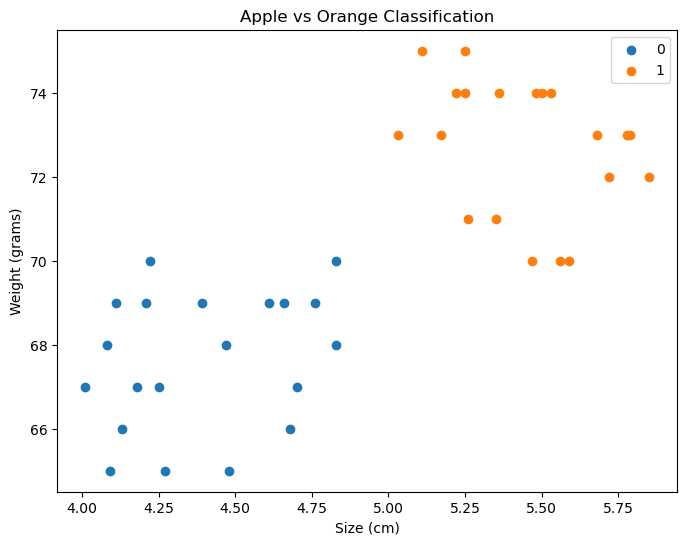

In [17]:
plt.figure(figsize=(8, 6))
for fruit_class in df['Class'].unique():
    subset = df[df['Class'] == fruit_class]
    plt.scatter(subset['Size'], subset['Weight'], label=fruit_class)

plt.xlabel('Size (cm)')
plt.ylabel('Weight (grams)')
plt.title('Apple vs Orange Classification')
plt.legend()
plt.show()


## Spliting the data into Traning and Testing

In [19]:
x = df.drop(['Class'], axis=1)
x.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [20]:
y = df['Class']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Class, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.3 , random_state=42)

In [22]:
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (28, 2)
The shape of y_train is: (28,)
We have m = 28 training examples


In [23]:
print ('The shape of X_test is: ' + str(x_test.shape))
print ('The shape of y_test is: ' + str(y_test.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_test is: (12, 2)
The shape of y_test is: (12,)
We have m = 28 training examples


## Model Training and Evaluation


In [25]:
k_values = [3, 5, 7]

results = [] 
for k in k_values:
      knn_classifier = KNeighborsClassifier(n_neighbors=k)
      knn_classifier.fit(x_train, y_train)

print(x_test)

y_pred = knn_classifier.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


    Weight  Size
19      74  5.50
16      69  4.66
15      65  4.48
26      67  4.01
4       67  4.70
12      74  5.53
37      74  5.48
27      70  4.22
39      73  5.03
6       70  5.56
25      71  5.35
9       65  4.27
[1 0 0 0 0 1 1 0 1 0 1 0]
Accuracy: 0.9166666666666666


C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


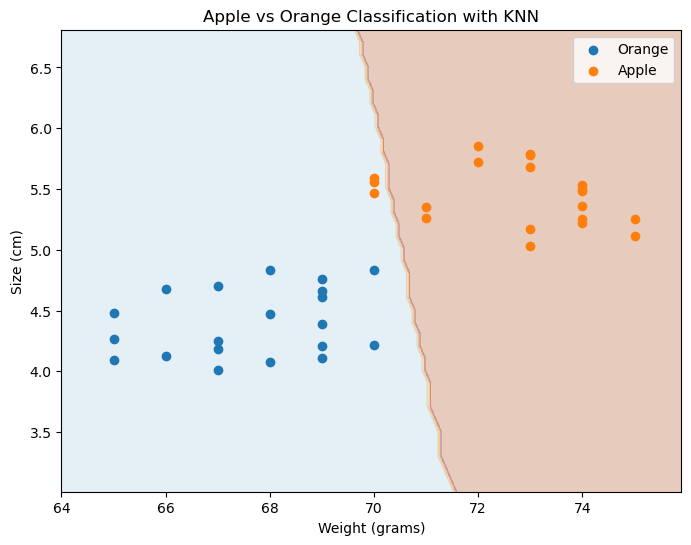

In [26]:
x_min, x_max = x['Weight'].min() - 1, x['Weight'].max() + 1 
y_min, y_max = x['Size'].min() - 1, x['Size'].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1)) 

Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()]) 

Z = Z.reshape(xx.shape)
 
plt.figure(figsize=(8, 6)) 
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired) 

for fruit_class in df['Class'].unique(): 
    subset = df[df['Class'] == fruit_class] 
    plt.scatter(subset['Weight'], subset['Size'], label='Apple' if fruit_class == 1 else 'Orange') 
plt.xlabel('Weight (grams)') 
plt.ylabel('Size (cm)') 
plt.title('Apple vs Orange Classification with KNN')
plt.legend() 
plt.show()


### The model's performance is evaluated using accuracy and confusion matrices for different values of k (3, 5, and 7). The confusion matrices help visualize the classification performance for each k value.

## Confusion Matrix for only testing dataset

Accuracy: 1.0


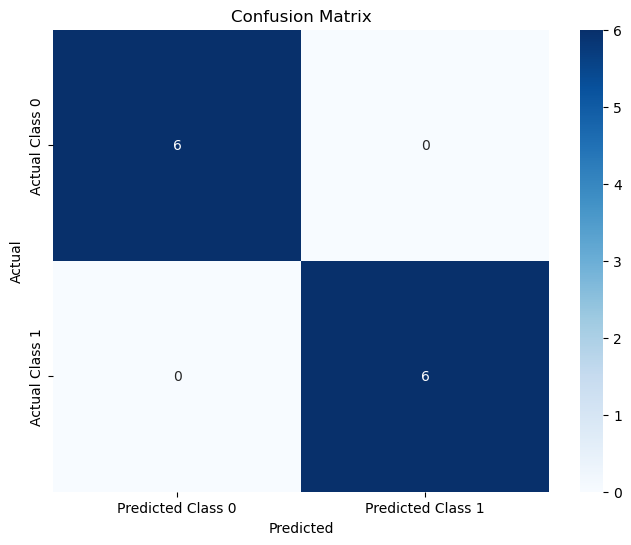

In [29]:
import seaborn as sns
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(x_train, y_train)


y_pred = knn_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Confusion Matrix for traning and testing datase

Training Accuracy: 1.0
Test Accuracy: 1.0


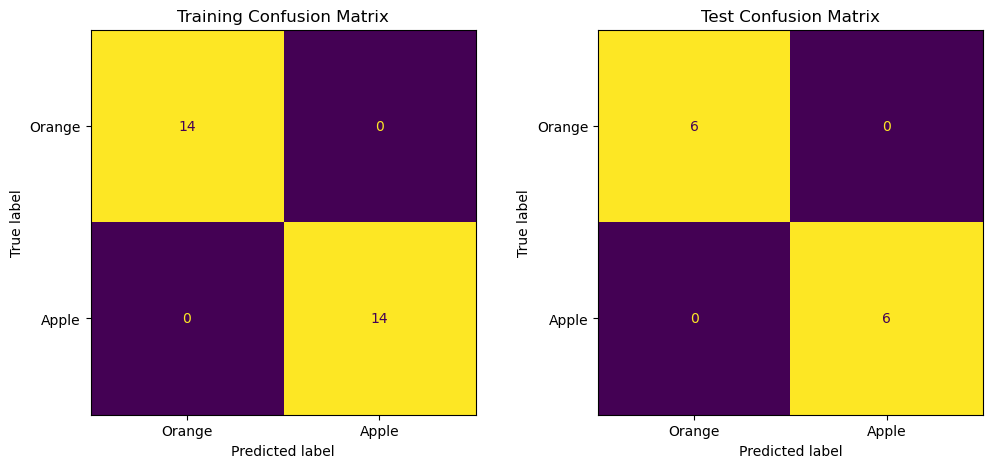

In [31]:
y_train_pred = knn_classifier.predict(x_train)
y_test_pred = knn_classifier.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(train_cm, display_labels=['Orange', 'Apple']).plot(ax=ax[0], colorbar=False)
ConfusionMatrixDisplay(test_cm, display_labels=['Orange', 'Apple']).plot(ax=ax[1], colorbar=False)
ax[0].set_title('Training Confusion Matrix')
ax[1].set_title('Test Confusion Matrix')
plt.show()


In [32]:
new_data_point = pd.DataFrame({'Weight': [150], 'Size': [7.1]})

In [33]:
predicted_class = knn_classifier.predict(new_data_point) 
predicted_label = 'apple' if predicted_class[0] == 1 else 'orange' 
print(f"The predicted class for the new data point (Weight: 150, Size: 7.1) is: {predicted_label}")

The predicted class for the new data point (Weight: 150, Size: 7.1) is: apple
